## Theoretical foundations of RL
___

### Markov decision processes (MDP)
Markov process (MP) + rewards --> Markov reward process

Markov reward process + actions --> Markov decision process (MDP)

### The Markov process
Imagine that you have some system in front of you that you can **only** observe. What you observe is called **states**, and the system can switch beteween states according to some laws of dynamics.

All posible states are called the **state space**. For MPs, we require this set of states to be **finite**. Our observations form a sequence of states or a **chain** (Markov chain)

For example, looking at the simplest model fo the weather in some city, we can observe the current day as _sunny_ or _cloudy_, which is our state space. A sequence of observations over time forms a chain of states, such as {_sunny → sunny → rainy → sunny..._}, and this is called **episode**

To call such a system a MP, it needs to fulfill the **Markov property**, which means that the future system dynamics from any state have to depend on this state **only**. In other words, the Markov property makes every observable state self-contained to describe the **future** of the system. **Only one state is required to model the future dynamics of the system** and not the whole history or, say, the last _N_ states.

If we want to make our model more complex, we can do this by extending our state space. For example, adding summer and winter seasons so our new state space would be {_sunny+summer, sunny+winter, rainy+summer, rainy+winter_}.

As our system model complies with the Markov property, you can capture transition probabilities with a **transition matrix**, which is a square matrix of the size _NxN_, where _N_ is the number of states in our model. For example,

<br>

| | Sunny | Rainy |
| --- | --- | --- |
| Sunny | 0.8 | 0.2 |
| Rainy | 0.1 | 0.9 |

<br>

The **formal definition of an MP** is as follows:
* A **set of states (_S_)** that a system can be in
* A **transition matrix (_T_)**, with transition probabilities, which defines the system dynamics.

<br>

A useful visual representation of an MP is a **graph** whith nodes corresponding to system states and edges, labeled with probabilities, representing a possible transition from state to state.

<br>

![img/weather_mp.png](img/weather_mp.png)

<br>

It's important to understand the difference between the actual transitions observed in an episode and the underlying distribution given in the transition matrix. Concrete episodes that we observe are randomly sampled from the distribution of the model, so they can _differ_ from episode to episode. However, the probability of the concrete transition to be sampled remains the same.



### Markov reward processes
To introduce reward, we need to extend our MP model. We need to add **value** to our transition from state to state. In general, we'll have another square matrix, similar to the transition matrix, with reward given for transitioning from state i to state j. This reward could be positive or negative, large or small. In some cases, the reward will depend only for reaching the state, regardless of the previous state.

The second thing we need to add to the model is the **discount factor** 𝛾 (_gamma_), which is a single number in the range \[0, 1\]

With these two new additions to our model, we can define the **return at time _t_** of an episode as:

![img/f_value_of_state.png](img/f_value_of_state.png)


For every time point, we calculate return as a **sum of subsequent rewards**, but with less weight of future rewards as we move forward in time.

The discount factor stands for the **foresightened** of the agent. If gamma equals 1, then return G<sub>t</sub> just equals a sum of all subsequents rewards and corresponds to he agent that has perfect visibility of any subsequent rewards. If gamma equals 0, G<sub>t</sub> will be just immediate reward whitout any subsequent state and will correspond to absolute short-sightedness. The closer it is to 1, the more steps ahead of us we will take into account.

This return quantity is not very useful in practice, as it was defined for every specific chain. A more valuable quantity is the **value of the state**, which is an average of the return over large number of chains, or the **expectation of return**:

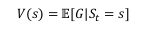

Let's see an example







#### example: The Office Worker (Markov reward process)
Our state space will be:
* Home
* Computer
* Coffe
* Chatting

being the transition graph something like that

<br>

![img/states_graph.png](img/states_graph.png)

<br>

We assume that our office worker's weekday starts from the **Home** state and that he starts his day with **Coffe** whitout exception. The diagram also shows that workdays always end going to the **Home** state from the **Computer** state.

Our transition matrix (probabilities) could be something like:

<br>

| | Home | Coffee | Chat | Computer |
| --- | --- | --- | --- | --- |
| Home | 0.6 | 0.4 | 0.0 | 0.0 | 
| Coffee | 0.0 | 10.0 | 0.7 | 0.2 |
| Chat | 0.0 | 0.2 | 0.5 | 0.3 |
| Computer | 0.2 | 0.2 | 0.1 | 0.5 |

<br>

Resulting in the next transition graph:

<br>

![img/states_graph_with_prob.png](img/states_graph_with_prob.png)

<br>

Let's extend now our model with the following rewards and turn it into a **Office Worker reward process (RP)**

* Home → Home: 1
* Home → Coffe: 1
* Computer → Computer: 5
* Computer → Chat: -3
* Chat → Computer: 2
* Computer → Coffee: 1
* Coffee → Computer: 3
* Coffee → Coffee: 1
* Coffee → Chat: 2
* Chat → Coffee: 1
* Chat → Chat: -1

The resulting diagram will be:

<br>

![img/states_graph_with_prob_and_reward.png](img/states_graph_with_prob_and_reward.png)

<br>

Given the previous graph, how we could compute the **value of a state** (or **how good is to be in a state**)?

For a given 𝛾 = 0, our return (total future reward) is equeal only to the reward of the transition to the next state, multiply by the probability of transition:

<br>

* V(_chat_) = -1\*0.5 + 2\*0.3 + 1\*0.2 = 0.3
* V(_coffee_) = 2\*0.7 + 1\*0.1 + 3\*0.2 = 2.1
* V(_home_) = 1\*0.6 + 1\*0.4 = 1.0
* V(_computer_) = 5\*0.5 + (-3)\*0.1 + 1\*0.2 + 2\*0.2 = 2.8

<br>

So, **Computer** is the most valuable state to be in (if we care only about immediate reward)

<br>

For a given 𝛾 = 1, the value will be **infinite** for all states, as our model doesn't contain _sink_ states (states without outgoing transitions), so we could have potentially infinite number of transitions in the future (that is the reason whe have a 𝛾 factor in the range \[0, 1\]). This 𝛾 value is only useful if we're dealing with finite-horizon enviroments. For example, the tic-tac-toe game (episodes until nine steps) or multi-armed bandit (episodes of one step)

<br>

For 𝛾 values greater than 0 and less than 1, by hand computation becomes almost impossible, so we need computers and clever methods (tabular learning, Bellman equation, q-learning,..)

### Adding actions. Markov decission processes (MDP)
The next logic step would be to include actions in our model. First, we have to define a **finite** set of actions (_A_), our agent's **action space**. Secondly, we will extend our transtion matrix with a new dimension. Let's see how.

Our previous transition matrix had a square form, with the source state in rows and target state in columns. So, for given state, we had the probabilities to jump to every state.

<br>

![img/transition_matrix.png](img/transition_matrix.png)

<br>

As those jumps are consequence of an agent's action, we have to add a **depth dimension** with the probability of jump to the target state from the source state for every possible action.

<br>

![img/MDP_transition_matrix.png](img/MDP_transition_matrix.png)

<br>

For example, let's imagine a small robot that lives in a 3x3 grid and can execute the actions _turn left, turn right_ and _go forward_. The state of the world is the robot position plus orientation (3 x 3 x 4 = 36 states).

Also, consider a stochastic environment (non-deterministic) where for every action exists some probability such that action not being taken by the robot and stays in the same position.

To capture all these details about the environment and possible reactions to the agent actions, the general MDP has a 2D transition matrix with the dimensions source state, action, and target state.

<br>

![img/gridworld.png](img/gridworld.png)

<br>

Finally, to turn our Markov reward process into MDP, we need to add actions to our reward matrix in the same way that we did with the transition matrix. Our reward matrix will depend not only on the state but also on the action that leads to this state.



### Policy
We can define **policy** as some set of rules that controls the agent's behavior.

Given an environment, we can define different policies for our agents, which will lead to different sets of valid states. So, different policies will give them different amounts of return.

Formally, policy is defined as the probabilty distribution over actions for every possible state (what is the probability of take an specific action given the actual state?)

<br>

![img/f_policy.png](img/f_policy.png)

<br>

